## Variable "dia" PRUEBA 2

Aqui se verificará el DIA usando las variables de tipologia resumidas aplicadas en tipologia prueba 2 para verificar resultados

In [44]:
!pip install plotly
import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt #Proporciona una forma de trazado similar a MATLAB. pyplot está diseñado principalmente para gráficos interactivos y casos simples de generación de tramas programáticas. La API orientada a objetos se recomienda para gráficos más complejos.
import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
#Dataset
# ------------------------------------------------------------------------------
df= pd.read_csv('AT2018_NBD.csv')
df1= pd.read_csv('AT2019_NBD.csv')
df2= pd.read_csv('AT2020_NBD.csv')
df=df.append(df1)
df=df.append(df2)
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-44-f7909ba238b5>:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,fecha,dia,hora,tipologia,direccion,zona,parroquia_urbana,causas,nro_heridos,nro_fallecidos,latitud,longitud,gravedad,vehiculos_retenidos,senalizacion_existente
0,09-26,miercoles,h13,atropello,cuero y caicedo entre manuel angulo y carlos m...,urbana,punzara,imprudencia del peaton,1,0,NaN,NaN,NaN,NaN,NaN
1,09-27,jueves,h20,atropello,mayas y juan jose samaniego,urbana,sucre,negligencia del conductor,1,0,NaN,NaN,NaN,NaN,NaN
2,09-28,viernes,h18,choque lateral perpendicular,jose martinez ruiz y sixto duran romero,urbana,san sebastian,condiciones climaticas desfavorables,1,0,NaN,NaN,NaN,NaN,NaN
3,09-28,viernes,h21,estrellamiento,pablo palacios y cesar p. ludena,urbana,carigan,fallas mecanicas no previsibles,0,0,NaN,NaN,NaN,NaN,NaN
4,09-29,sabado,h19,choque lateral perpendicular,universitaria y quito,urbana,el sagrario,imprudencia del conductor,0,0,NaN,NaN,NaN,NaN,NaN


Graficamos el mapa de calor de accidentabilidad dentro del cantón Loja

In [45]:
fig = px.density_mapbox(df,lat='latitud', lon='longitud',radius=3,center=dict(lat=-3.99313,lon=-79.20422),zoom=10.5,mapbox_style="open-street-map")

fig.show()

In [46]:
#verifico datos nulos
df.isnull().sum()

fecha                       0
dia                         0
hora                        0
tipologia                   0
direccion                   0
zona                        0
parroquia_urbana            0
causas                      0
nro_heridos                 0
nro_fallecidos              0
latitud                   147
longitud                  147
gravedad                  653
vehiculos_retenidos       653
senalizacion_existente    653
dtype: int64

In [47]:
df=df.loc[:,df.columns!="fecha"]
df=df.loc[:,df.columns!="zona"]
df=df.loc[:,df.columns!="latitud"]
df=df.loc[:,df.columns!="longitud"]
df=df.loc[:,df.columns!="direccion"]
df=df.loc[:,df.columns!="gravedad"]
df=df.loc[:,df.columns!="vehiculos_retenidos"]
df=df.loc[:,df.columns!="senalizacion_existente"]
df=df.loc[:,df.columns!="condicion_calzada"]
df=df.loc[:,df.columns!="condicion_atmosferica"]

In [48]:
df.isnull().sum()

dia                 0
hora                0
tipologia           0
parroquia_urbana    0
causas              0
nro_heridos         0
nro_fallecidos      0
dtype: int64

In [49]:
df.sample(10)

,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
21,lunes,h03,roce negativo,san sebastian,imprudencia del conductor,0,0
8,lunes,h17,atropello,sucre,conducir en estado de embriaguez,0,0
104,domingo,h17,colision,punzara,conducir en estado de embriaguez,2,0
221,lunes,h06,choque lateral angular,punzara,no ceder el derecho de via,1,0
361,sabado,h10,choque lateral perpendicular,sucre,imprudencia del conductor,1,0
186,viernes,h00,atipico,el valle,imprudencia del conductor,0,0
143,domingo,h04,choque lateral angular,el sagrario,conducir en estado de embriaguez,1,0
17,sabado,h05,estrellamiento,el valle,conducir en estado de embriaguez,0,0
99,sabado,h23,estrellamiento,carigan,imprudencia del conductor,1,0
308,miercoles,h16,choque por alcance,sucre,no mantener la distancia reglamentaria,0,0


In [50]:
df.head()

,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,miercoles,h13,atropello,punzara,imprudencia del peaton,1,0
1,jueves,h20,atropello,sucre,negligencia del conductor,1,0
2,viernes,h18,choque lateral perpendicular,san sebastian,condiciones climaticas desfavorables,1,0
3,viernes,h21,estrellamiento,carigan,fallas mecanicas no previsibles,0,0
4,sabado,h19,choque lateral perpendicular,el sagrario,imprudencia del conductor,0,0


In [51]:
ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El numero de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El numero de columnas(variables) es: ",len(ds.columns))

El numero de filas(observaciones) es:  1028
El numero de columnas(variables) es:  7


In [52]:
# tipos de la variables
ds.dtypes

dia                 object
hora                object
tipologia           object
parroquia_urbana    object
causas              object
nro_heridos          int64
nro_fallecidos       int64
dtype: object

In [53]:
df['causas'].value_counts()

conducir en estado de embriaguez                  235
imprudencia del conductor                         228
conducir en exceso de velocidad                   220
no ceder el derecho de via                        114
no respetar las senales de transito                67
imprudencia del peaton                             51
no mantener la distancia reglamentaria             43
negligencia del conductor                          17
fallas mecanicas no previsibles                    13
cambio brusco e indebido de carril                 11
condiciones climaticas desfavorables                8
invadir carril de circulacion                       5
razones desconocidas                                5
desatento a la conduccion                           3
cruce de via sin preferencia                        2
perdida de pista                                    2
imprudencia del pasajero                            1
no respetar las ordenes del agente de transito      1
impericia del conductor     

In [54]:
print(df['causas'].unique())# datos en texto

['imprudencia del peaton' 'negligencia del conductor'
 'condiciones climaticas desfavorables' 'fallas mecanicas no previsibles'
 'imprudencia del conductor' 'conducir en estado de embriaguez'
 'no ceder el derecho de via' 'cambio brusco e indebido de carril'
 'no mantener la distancia reglamentaria' 'desatento a la conduccion'
 'no respetar las senales de transito' 'imprudencia del pasajero'
 'cruce de via sin preferencia' 'perdida de pista'
 'conducir en exceso de velocidad' 'invadir carril de circulacion'
 'razones desconocidas' 'no respetar las ordenes del agente de transito'
 'impericia del conductor' 'inobservancia de leyes de transito']


In [55]:
print(df['causas'].unique())# datos en texto

['imprudencia del peaton' 'negligencia del conductor'
 'condiciones climaticas desfavorables' 'fallas mecanicas no previsibles'
 'imprudencia del conductor' 'conducir en estado de embriaguez'
 'no ceder el derecho de via' 'cambio brusco e indebido de carril'
 'no mantener la distancia reglamentaria' 'desatento a la conduccion'
 'no respetar las senales de transito' 'imprudencia del pasajero'
 'cruce de via sin preferencia' 'perdida de pista'
 'conducir en exceso de velocidad' 'invadir carril de circulacion'
 'razones desconocidas' 'no respetar las ordenes del agente de transito'
 'impericia del conductor' 'inobservancia de leyes de transito']


In [56]:
df['causas']= df['causas'].apply(lambda x: 
                                    1 if x == 'conducir en estado de embriaguez' else 
                                    2 if x == 'imprudencia del conductor' else 
                                    3 if x == 'no ceder el derecho de via' else
                                    4 if x == 'conducir en exceso de velocidad' else 
                                    5 if x == 'cambio brusco e indebido de carril' else
                                    6 if x == 'fallas mecanicas no previsibles' else
                                    7 if x == 'no respetar las senales de transito' else
                                    8 if x == 'invadir carril de circulacion' else
                                    9 if x == 'imprudencia del peaton' else
                                    10 if x == 'no mantener la distancia reglamentaria' else
                                    11 if x == 'razones desconocidas' else
                                    12 if x == 'condiciones climaticas desfavorables' else
                                    13 if x == 'negligencia del conductor' else
                                    14 if x == 'no respetar las ordenes del agente de transito' else
                                    15 if x == 'impericia del conductor' else
                                    16)


In [57]:
print(df['parroquia_urbana'].unique()) # datos convertidos a numeros enteros

['punzara' 'sucre' 'san sebastian' 'carigan' 'el sagrario' 'el valle']


In [58]:
df['parroquia_urbana']= df['parroquia_urbana'].apply(lambda x: 
                                    1 if x == 'el sagrario' else 
                                    2 if x == 'san sebastian' else 
                                    3 if x == 'el valle' else
                                    4 if x == 'sucre' else 
                                    5 if x == 'punzara' else
                                    6 if x == 'carigan' else
                                    7)

In [59]:
print(df['parroquia_urbana'].unique()) # datos convertidos a numeros enteros

[5 4 2 6 1 3]


In [60]:
print(df['tipologia'].unique()) # datos convertidos a numeros enteros

['atropello' 'choque lateral perpendicular' 'estrellamiento'
 'choque frontal longitudinal' 'choque lateral angular' 'roce negativo'
 'colision' 'choque por alcance' 'roce positivo' 'perdida de carril'
 'choque frontal excentrico' 'caida de pasajero' 'perdida de pista'
 'atipico' 'encunetamiento' 'arrollamiento' 'rozamiento'
 'volcamiento lateral' 'volcamiento longitudinal' 'volcamiento'
 'choque frontal']


In [61]:
#Aplico seleccion de datos similares para mejorar la precisión del modelo
df['tipologia']= df['tipologia'].apply(lambda x: 
                                    1 if x == 'arrollamiento' else 
                                    2 if x == 'atipico' else 
                                    3 if x == 'atropello' else
                                    4 if x == 'caida de pasajero' else 
                                    5 if x == 'choque frontal' else
                                    6 if x == 'choque frontal excentrico' else
                                    7 if x == 'choque frontal longitudinal' else
                                    8 if x == 'choque lateral angular' else
                                    9 if x == 'choque lateral perpendicular' else
                                    10 if x == 'choque por alcance' else
                                    11 if x == 'colision' else
                                    12 if x == 'encunetamiento' else
                                    13 if x == 'estrellamiento' else
                                    14 if x == 'perdida de carril' else
                                    15 if x == 'perdida de pista' else
                                    16 if x == 'roce negativo' else
                                    17 if x == 'roce positivo' else
                                    18 if x == 'rozamiento' else
                                    19 if x == 'volcamiento' else
                                    20 if x == 'volcamiento lateral' else
                                    21)

In [62]:
print(df['tipologia'].unique()) # datos convertidos a numeros enteros

[ 3  9 13  7  8 16 11 10 17 14  6  4 15  2 12  1 18 20 21 19  5]


In [63]:
df['dia']= df['dia'].apply(lambda x: 
                                    1 if x == 'lunes' else 
                                    1 if x == 'martes' else 
                                    1 if x == 'miercoles' else
                                    2 if x == 'jueves' else 
                                    2 if x == 'viernes' else
                                    3 if x == 'sabado' else
                                    3 )

In [64]:
print(df['dia'].unique()) # datos convertidos a numeros enteros

[1 2 3]


In [65]:
df= df[df['parroquia_urbana'] <= 6]

In [66]:
df['hora']= df['hora'].apply(lambda x: 
                                    0 if x == 'h00' else
                                    1 if x == 'h01' else 
                                    2 if x == 'h02' else 
                                    3 if x == 'h03' else
                                    4 if x == 'h04' else 
                                    5 if x == 'h05' else
                                    6 if x == 'h06' else
                                    7 if x == 'h07' else
                                    8 if x == 'h08' else
                                    9 if x == 'h09' else
                                    10 if x == 'h10' else
                                    11 if x == 'h11' else
                                    12 if x == 'h12' else
                                    13 if x == 'h13' else
                                    14 if x == 'h14' else
                                    15 if x == 'h15' else
                                    16 if x == 'h16' else
                                    17 if x == 'h17' else
                                    18 if x == 'h18' else
                                    19 if x == 'h19' else
                                    20 if x == 'h20' else
                                    21 if x == 'h21' else
                                    22 if x == 'h22' else
                                    23)

In [67]:
df.head()

,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,1,13,3,5,9,1,0
1,2,20,3,4,13,1,0
2,2,18,9,2,12,1,0
3,2,21,13,6,6,0,0
4,3,19,9,1,2,0,0


In [68]:
# datos aleatorios (muestra de 10 elementos)

df.sample(10)


,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
140,3,0,10,4,1,0,0
0,1,0,9,4,3,1,0
59,2,7,9,4,3,1,0
61,2,23,8,1,1,2,0
425,1,21,3,6,9,1,0
10,1,20,6,4,5,3,0
325,3,2,13,1,1,0,0
387,1,12,8,4,3,1,0
154,1,11,13,5,1,0,0
96,2,12,11,1,2,0,0


In [69]:
X = df.iloc[:, [1,2,3,4,5,6]] # atributos de entrada seran las primeras columnas
Y = df.iloc[:,[0]] # atributos de destino

#X.sample(10) #presentacion de los atriutos de entrada
X.head()

,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,13,3,5,9,1,0
1,20,3,4,13,1,0
2,18,9,2,12,1,0
3,21,13,6,6,0,0
4,19,9,1,2,0,0


Verificamos la correlacion de los datos

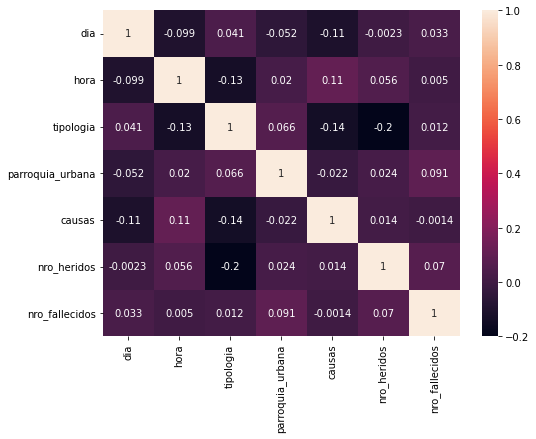

In [70]:
#corelacion
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [71]:
#presentacion de los atributos de destino
Y.head()

,dia
0,1
1,2
2,2
3,2
4,3


Dividimos nuestros datos en las tablas de testing y training "X_train" y "y_train", seran para crear el modelo.

"X_test" y "y_test" serviran para saber que tan bien predice el modelo.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)# stratify=y
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 822 datos para entrenamiento y 206 datos para prueba


Me muestra la información de la tabla de entrenamiento

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 213 to 28
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   hora              822 non-null    int64
 1   tipologia         822 non-null    int64
 2   parroquia_urbana  822 non-null    int64
 3   causas            822 non-null    int64
 4   nro_heridos       822 non-null    int64
 5   nro_fallecidos    822 non-null    int64
dtypes: int64(6)
memory usage: 45.0 KB


Cargamos la libreria DecisionTreeClasifier

In [74]:
y_train.shape[0]

822

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

#Llamamos al constructor del arbol de decision
classifier = DecisionTreeClassifier(max_depth=3,criterion = 'entropy')

#Entrenamos el modelo
arbol_modelo = classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

Ahora vamos a crear la figura del Árbol

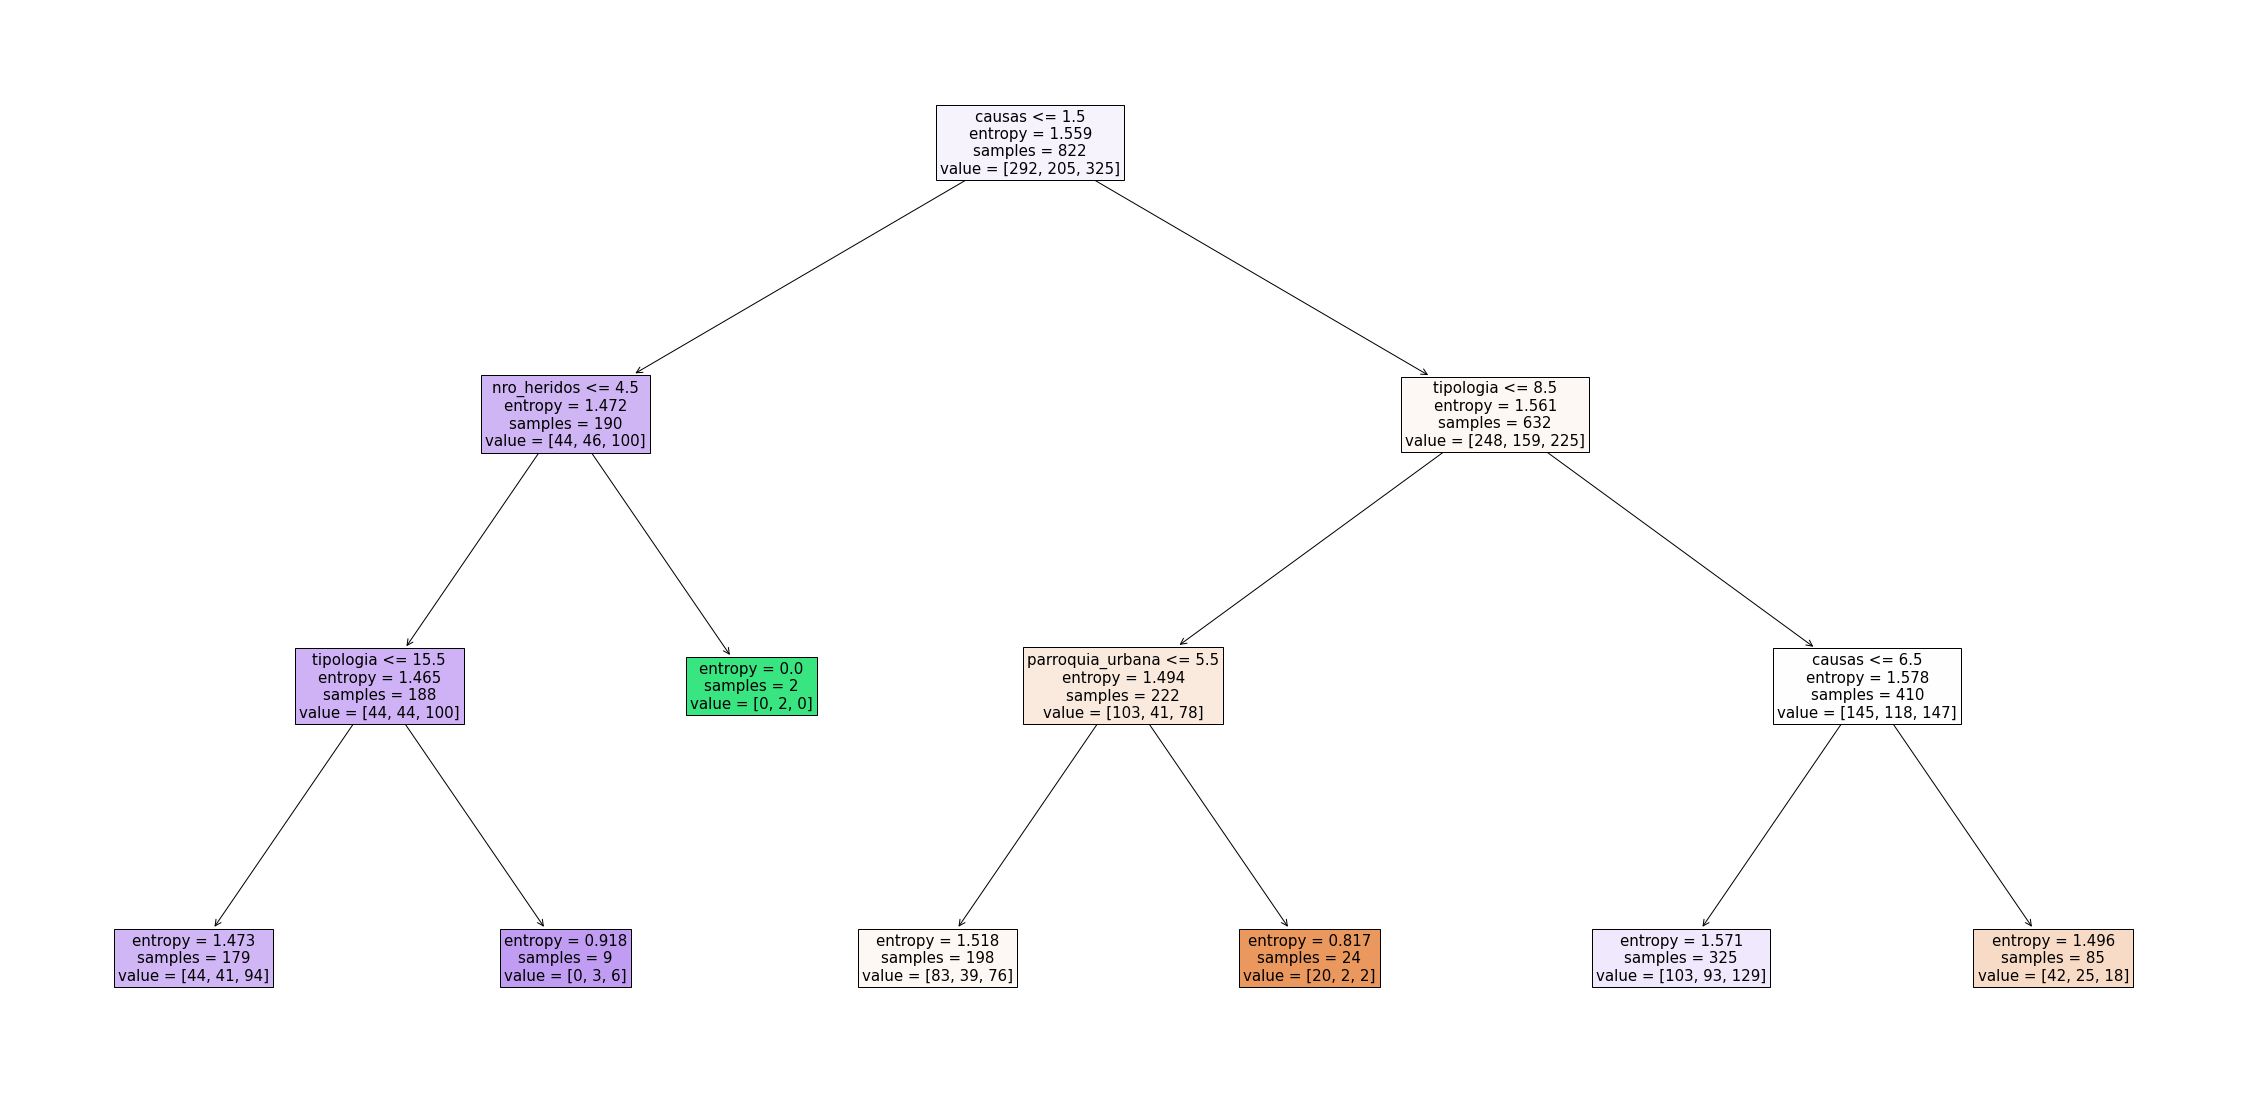

In [76]:

figura_arbol = plt.figure(figsize=(40,20)) # Le indicamos las dimensiones que queremos que tenga
plot_tree(arbol_modelo,feature_names=X.columns,filled=True, fontsize=15)
plt.show()

In [77]:
figura_arbol.savefig("arbol_colab_dia_p2.png")

In [78]:
# Resumen de las predicciones hechas por el clasificador
from sklearn import metrics
reporte = metrics.classification_report(y_test, y_pred,output_dict=True)
pre = pd.DataFrame(reporte).transpose()
print(pre)
pre.to_excel("resumen_precision_dia_p2.xlsx")

              precision    recall  f1-score     support
1              0.328947  0.403226  0.362319   62.000000
2              0.000000  0.000000  0.000000   63.000000
3              0.415385  0.666667  0.511848   81.000000
accuracy       0.383495  0.383495  0.383495    0.383495
macro avg      0.248111  0.356631  0.291389  206.000000
weighted avg   0.262334  0.383495  0.310308  206.000000


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [79]:
y_test.head()

,dia
271,1
369,2
9,3
174,2
32,3


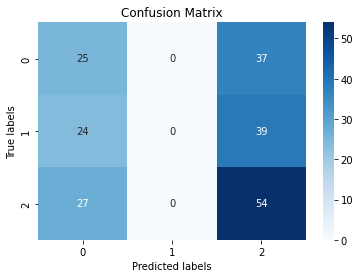

In [80]:
#Matriz de confusion
matriz=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(matriz, annot=True, cmap="Blues",fmt='g');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [81]:
cm = confusion_matrix(y_test, y_pred)

mc= pd.DataFrame(cm)
print(mc)
mc.to_excel("matriz_confusion_dia_p2.xlsx")

    0  1   2
0  25  0  37
1  24  0  39
2  27  0  54


In [82]:
#Para concatenar variables
import pandas as pd

prediccion = pd.DataFrame(y_pred,columns=['dia_prediccion'])
original = y_test
original.reset_index(drop=True, inplace=True)
df_combined = pd.concat([prediccion,original], axis=1)
df_combined.head(10)


,dia_prediccion,dia
0,1,1
1,1,2
2,1,3
3,1,2
4,3,3
5,3,2
6,1,1
7,3,3
8,3,3
9,3,2


Visualizamos el modelo

In [83]:
# Precisión
from sklearn.metrics import accuracy_score, recall_score, precision_score
print('Exactitud árboles de decisión: ',accuracy_score(y_pred,y_test)*100)
print('Exhaustividad árboles de decisión: ', recall_score(y_pred,y_test,average='micro')*100)
print('Precision árboles de decisión: ',accuracy_score(y_pred,y_test)*100)

Exactitud árboles de decisión:  38.349514563106794
Exhaustividad árboles de decisión:  38.349514563106794
Precision árboles de decisión:  38.349514563106794


Transformamos las variables

In [84]:
#transformar datos para visualización de variables predictoras y originales
df_combined['dia']= df_combined['dia'].apply(lambda x: 
                                    'lunes-miercoles' if x == 1 else 
                                    'jueves-viernes' if x == 2 else 
                                    'sabado-domingo')

df_combined['dia_prediccion']= df_combined['dia_prediccion'].apply(lambda x: 
                                    'lunes-miercoles' if x == 1 else 
                                    'jueves-viernes' if x == 2 else 
                                    'sabado-domingo')


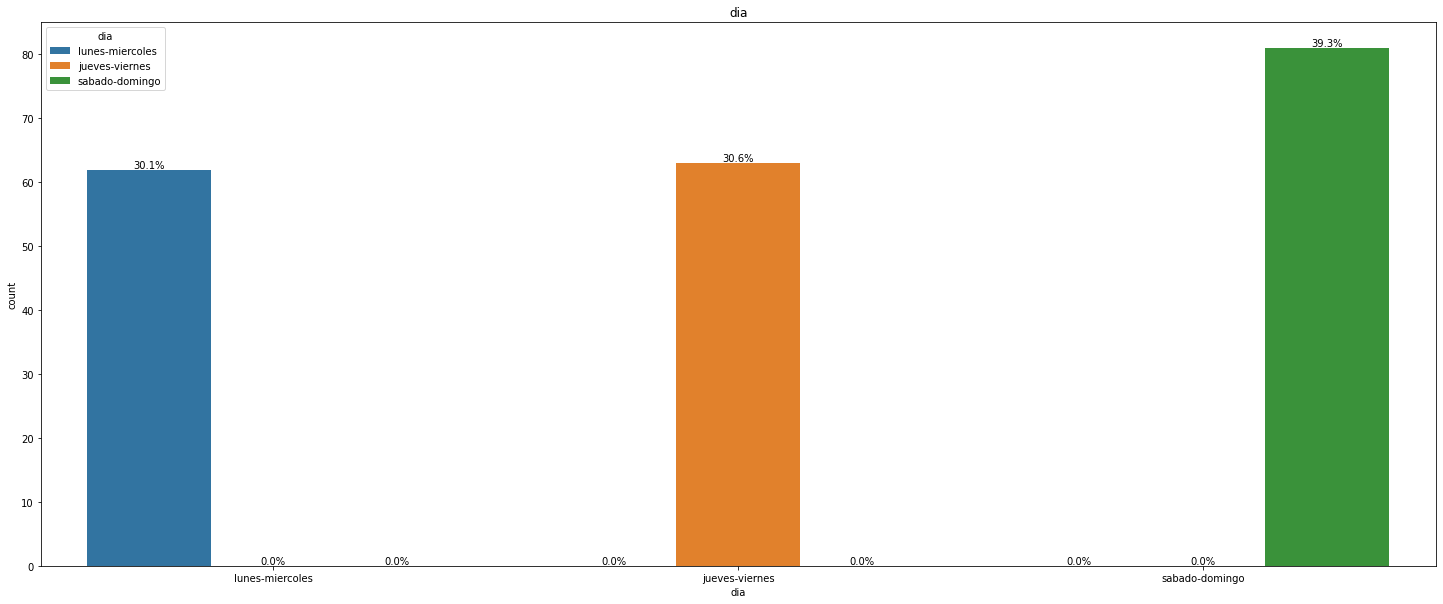

In [85]:
import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
ax = plt.subplots(figsize = (25,10))
ncount=len(df_combined)
#ax[1].plot(df['dia'],df['hora'],color = 'tab:purple')
sns.countplot(x='dia',hue = 'dia', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('dia')



for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax[0].savefig("barras_original_dia_p2.png")


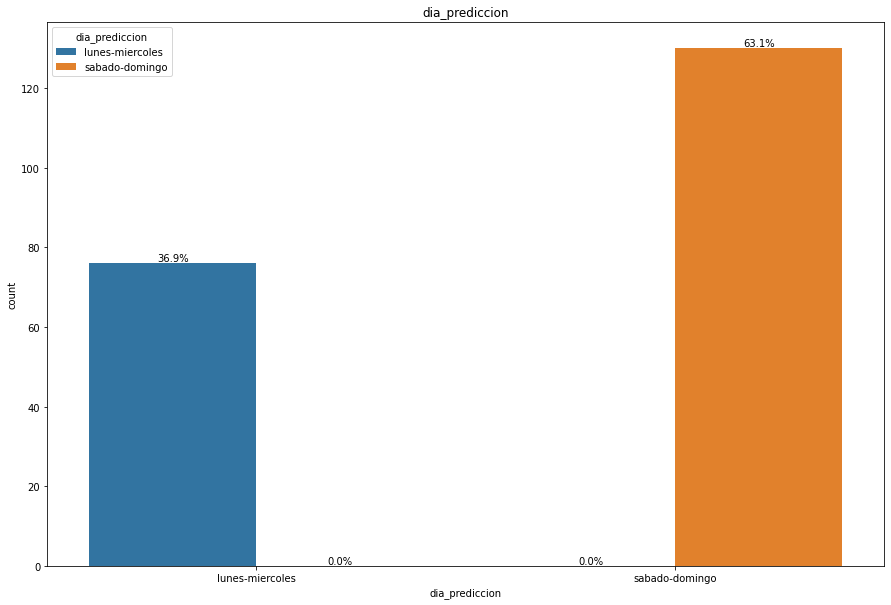

In [86]:
ax = plt.subplots(figsize = (15,10))
ncount=len(df_combined)
sns.countplot(x='dia_prediccion',hue = 'dia_prediccion', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('dia_prediccion')


for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras de predicción
ax[0].savefig("barras_prediccion_dia_p2.png")

Guardamos el modelo

In [87]:
from joblib import dump
dump(arbol_modelo, 'modelo_dia_python.joblib') 

['modelo_dia_python.joblib']